<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/visuallization/03_visuallization_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,144 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### loading dataset file and check dataframe

In [2]:
import pandas as pd

In [ ]:
df_LCOCT = pd.read_csv('LetalCarOfContractType.csv')
df_LCOCT[100:104]

In [4]:
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [ ]:
df_LCOCT.describe()

In [6]:
import seaborn as sns

## 다변수 시각화

### x: 범주 / y: 연속 : 설명 변수 / 목표 변수
- 막대 그래프 / 상자 그림

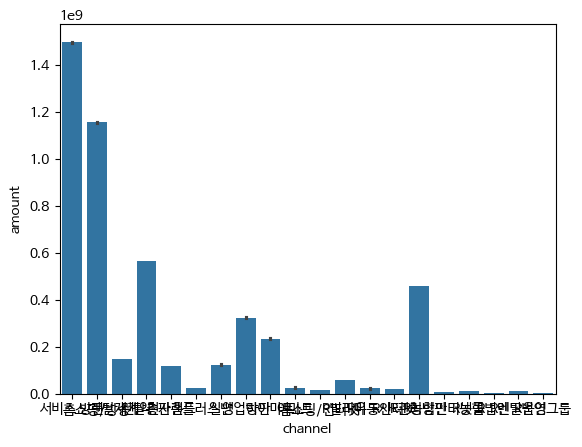

In [9]:
# 범주 : channel, 연속 : amount
# sns.barplot(data=df_LCOCT, x='channel', y='amount' )  # -= count
# sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum )  #
sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum )  #
plt.show()

#### 상위 5위인 범주만 전달

In [39]:
df_LCOCT_channel_amount_sum = pd.pivot_table(data=df_LCOCT, index='channel', values='amount', aggfunc='sum')
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False) # 정렬
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5] # 추출
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5].index # 추출
channel_amount_sum_5Rank = df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5].index.to_list() # 데이터 타입 변환
channel_amount_sum_5Rank

['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판', '영업방판']

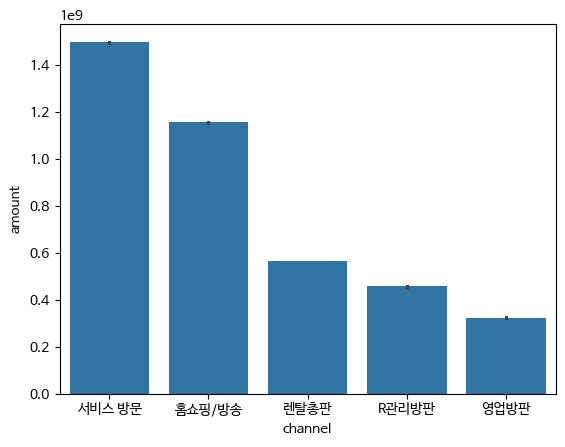

In [19]:
# sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum
#             , order=['렌탈총판', 'R관리방판', '영업방판'])
sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum
            , order=channel_amount_sum_5Rank)
plt.show()

#### 상위 5위인 dataframe 전달

In [33]:
df_LCOCT_channel_amount_sum_ = pd.pivot_table(data=df_LCOCT, index='channel', values='amount', aggfunc='sum')
df_LCOCT_channel_amount_sum_.reset_index(inplace=True)
df_LCOCT_channel_amount_sum_ = df_LCOCT_channel_amount_sum_.sort_values(by='amount', ascending=False)
df_LCOCT_channel_amount_sum_

,channel,amount
11,서비스 방문,1496420760
17,홈쇼핑/방송,1156173900
10,렌탈총판,565189800
0,R관리방판,458556039
12,영업방판,322955100
16,하이마트,234002706
9,렌탈재계약,147318600
14,일반,124029000
15,전자랜드,118252200
6,R빌리미,58267200


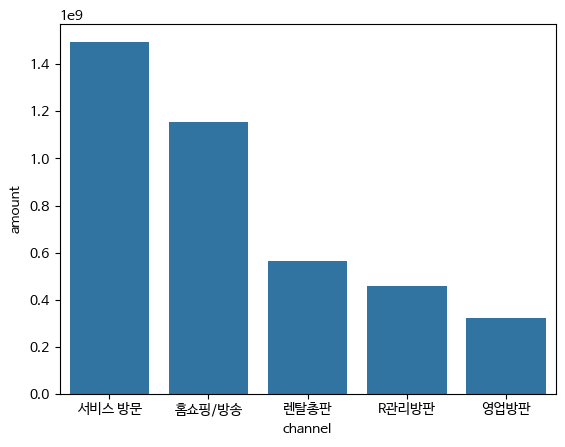

In [36]:
sns.barplot(data=df_LCOCT_channel_amount_sum_[:5], x='channel', y='amount')
plt.show()

#### boxplot
- 데이터 이상값 확인 시 사용 : 사전에 집계 함수 사용 안함

<Axes: xlabel='channel', ylabel='amount'>

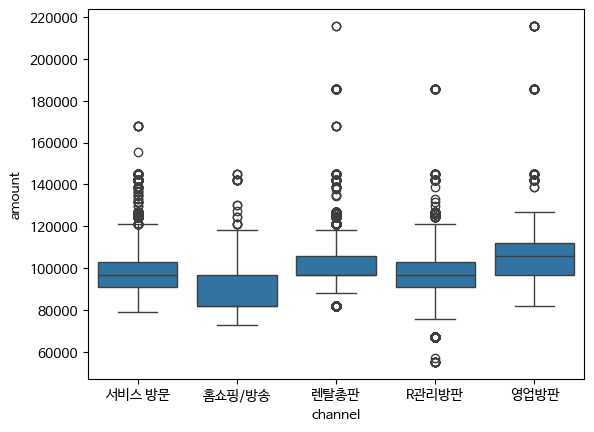

In [41]:
sns.boxplot(data=df_LCOCT, x='channel' , y='amount', order=channel_amount_sum_5Rank)


### X: 연속 / Y: 연속
- 산점도 / 회귀 그래프 / 히트맵

#### 산점도(scatterplot)

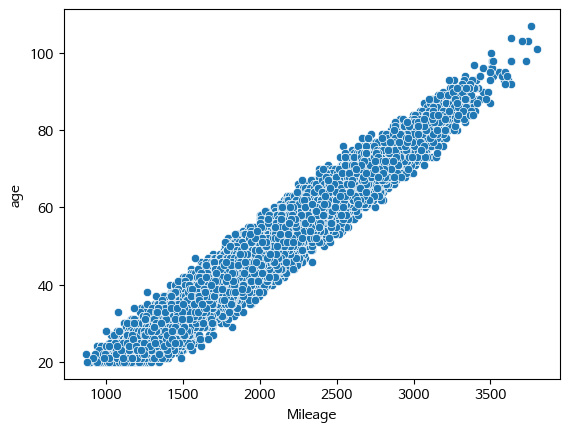

In [43]:
sns.scatterplot(data=df_LCOCT, x='Mileage', y='age')
plt.show()